In [1]:
import pandas as pd
import datetime
import seaborn as sns
import requests
import kaggle
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

How do I download using requests / API? <br>
https://github.com/Kaggle/kaggle-api <br>
kaggle datasets download -d christophercorrea/dc-residential-properties 

**General Exploration of the Data:**

In [2]:
#how do I not write the entire file path?
data = pd.read_csv('/Users/Julia/dc-residential-properties/DC_Properties.csv', low_memory=False)
print(data.shape)
print(data.columns.tolist())
data.head()

(158957, 49)
['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT']


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


In [3]:
ddat = pd.DataFrame.drop(data, columns = 'Unnamed: 0')

In [4]:
#combine BR columns
ddat['BATHRMS'] = ddat['BATHRM'] + ddat['HF_BATHRM']
ddat = pd.DataFrame.drop(ddat, columns = ['BATHRM', 'HF_BATHRM'])

In [5]:
#percentages of NaN values per column
def perc_nan(df):
    percnan=(df.isnull().sum(axis=0))/len(df)
    print(percnan)
perc_nan(ddat)

HEAT                  0.000000
AC                    0.000000
NUM_UNITS             0.328774
ROOMS                 0.000000
BEDRM                 0.000000
AYB                   0.001705
YR_RMDL               0.490881
EYB                   0.000000
STORIES               0.329051
SALEDATE              0.168410
PRICE                 0.382122
QUALIFIED             0.000000
SALE_NUM              0.000000
GBA                   0.328774
BLDG_NUM              0.000000
STYLE                 0.328774
STRUCT                0.328774
GRADE                 0.328774
CNDTN                 0.328774
EXTWALL               0.328774
ROOF                  0.328774
INTWALL               0.328774
KITCHENS              0.328781
FIREPLACES            0.000000
USECODE               0.000000
LANDAREA              0.000000
GIS_LAST_MOD_DTTM     0.000000
SOURCE                0.000000
CMPLX_NUM             0.671226
LIVING_GBA            0.671226
FULLADDRESS           0.332901
CITY                  0.332832
STATE   

In [6]:
#delete NaN rows from X, Y, and ASSESSMENT_NBHD so we can use them as reference points for filling others
ddat = ddat.dropna(subset=['X', 'Y', 'ASSESSMENT_NBHD'])

In [7]:
#Are values the same for CITY and STATE?
print(ddat.CITY.value_counts())
print(ddat.STATE.value_counts())

WASHINGTON    105815
Name: CITY, dtype: int64
DC    105815
Name: STATE, dtype: int64


Drop because they're unessential for this analysis:
-  GIS_LAST_MOD_DTTM
-  BLDG_NUM
-  CMPLX_NUM <br>

Drop because we have same values for all: <br>
-  STATE
-  CITY <br>

Drop because NaN values will be difficult to fill well, and we have other measures of location: <br>
-  FULLADDRESS
-  NATIONALGRID

In [8]:
ddat = pd.DataFrame.drop(ddat, columns=['GIS_LAST_MOD_DTTM', 'BLDG_NUM', 'CMPLX_NUM', 'STATE', 'CITY', 'FULLADDRESS', 'NATIONALGRID'])
print(ddat.shape)

(158720, 40)


**Creating the dataset for price prediction:**

In [9]:
#We will make a small dataset, which contains no null values from price. 
sdat = ddat.dropna(subset=['PRICE'])
print(sdat.shape)

(98115, 40)


In [10]:
#if we remove all NaNs, we have no data.
nandat = sdat.dropna()
nandat.head()

,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,SOURCE,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,BATHRMS


*We will treat categorical and numerical data differently to detect outliers.*

In [11]:
#types of data in df
sdat.dtypes

HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
SOURCE                 object
LIVING_GBA            float64
ZIPCODE               float64
LATITUDE              float64
LONGITUDE             float64
ASSESSMENT_NBHD        object
ASSESSMENT_SUBNBHD     object
CENSUS_TRACT          float64
CENSUS_BLO

In [12]:
#TWO LISTS OF COLUMNS. ONE CATEGORICAL, ONE NUMERICAL: catcol and numcol
#TWO corresponding dataframes: catdf and numdf
catcol = []
numcol = []

for col in sdat.columns:
    if (sdat[col].dtype == object):
        catcol.append(col)
    if (sdat[col].dtype == np.int64) or (sdat[col].dtype == np.float64):
        numcol.append(col)
        
catdf = sdat[catcol].astype('category')
numdf = sdat[numcol].astype(np.float64)

print(catcol)
print(numcol)

['HEAT', 'AC', 'SALEDATE', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'SOURCE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'QUADRANT']
['NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'SALE_NUM', 'GBA', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'LIVING_GBA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT', 'X', 'Y', 'BATHRMS']


**Outlier detection for numerical columns:**

In [13]:
#show information about values, outlier counts, and fences per numerical variable 
#this will assist in evaluating the revelence of an outlier calculated via quantile method
def show_outliers(df_in, col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]
    print(col)
    print("fence_low:", fence_low) 
    print("Q1:", q1)
    print("Q3:", q3) 
    print("fence_high:", fence_high)
    print("num_outliers:", len(df_out))
    print((df_in[col].value_counts().sort_index()))
    print('')
    print('')
for col in numdf.columns:
    show_outliers(numdf, col)

NUM_UNITS
fence_low: 1.0
Q1: 1.0
Q3: 1.0
fence_high: 1.0
num_outliers: 8553
0.0       51
1.0    49246
2.0     6048
3.0      590
4.0     1856
5.0        5
6.0        3
Name: NUM_UNITS, dtype: int64


ROOMS
fence_low: -0.5
Q1: 4.0
Q3: 7.0
fence_high: 11.5
num_outliers: 3718
0.0        54
1.0        64
2.0      3888
3.0     13924
4.0     15893
5.0     10576
6.0     19936
7.0     11761
8.0      9195
9.0      4193
10.0     3581
11.0     1332
12.0     1785
13.0      422
14.0      314
15.0      170
16.0      796
17.0       34
18.0       66
19.0       17
20.0       82
21.0        8
22.0        4
23.0        5
24.0        7
25.0        3
26.0        1
28.0        2
30.0        1
31.0        1
Name: ROOMS, dtype: int64


BEDRM
fence_low: 0.5
Q1: 2.0
Q3: 3.0
fence_high: 4.5
num_outliers: 10972
0.0      3811
1.0     18679
2.0     23656
3.0     30099
4.0     14709
5.0      4272
6.0      1869
7.0       449
8.0       461
9.0        55
10.0       23
11.0        8
12.0       20
13.0        1
14.0      

num_outliers: 1645
199.0      1
209.0      1
217.0      1
231.0      1
232.0      1
237.0      1
238.0      3
241.0      1
252.0      1
258.0      2
259.0      1
260.0      2
262.0      2
264.0      4
266.0      2
268.0      1
272.0      1
273.0      1
274.0      1
275.0      1
276.0      1
277.0      2
278.0      4
279.0      2
280.0      2
282.0      1
284.0      7
285.0      4
286.0      2
288.0      2
289.0      2
290.0      1
292.0      2
294.0      6
295.0      1
299.0      6
300.0      2
302.0      1
303.0      1
305.0      2
306.0     14
307.0      8
308.0      1
309.0      4
310.0     16
311.0      5
312.0      3
313.0      2
314.0      2
315.0      8
316.0      2
317.0      5
318.0      2
319.0      4
320.0      7
321.0      6
322.0      4
323.0      4
324.0      2
325.0      1
326.0      9
327.0      6
328.0      3
329.0      2
330.0      4
331.0      4
332.0      2
333.0     10
334.0     10
335.0      2
336.0      4
337.0      2
338.0      2
339.0      2
340.0      2
      

In [14]:
#some columns look skew. 
#Let's find a way to eliminate outliers without eliminating too much skew by adjusting fences. 
def perc_outliers(df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    df_out = df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]
    print("Percentage of outliers:", len(df_out)/len(df_in))

Percentage of outliers: 0.016766039851195028
None


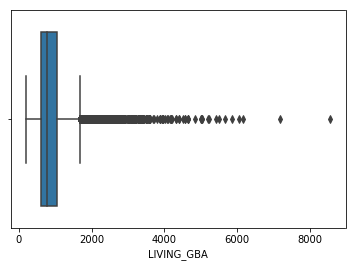

In [15]:
print(perc_outliers(sdat, 'LIVING_GBA', 1.5, 1.5))
sns.boxplot(x=sdat['LIVING_GBA'], whis=1.5)

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


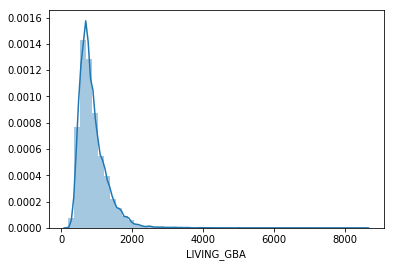

In [16]:
sns.distplot(sdat['LIVING_GBA'].dropna())

Percentage of outliers: 0.035896651888090506
None


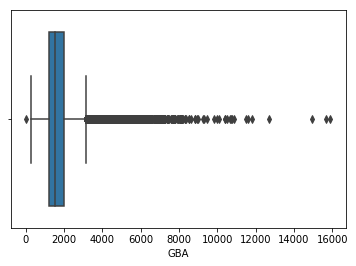

In [17]:
print(perc_outliers(sdat, 'GBA', 1.5, 1.5))
sns.boxplot(x=sdat['GBA'], whis=1.5)

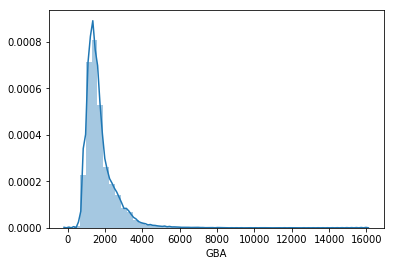

In [18]:
sns.distplot(sdat['GBA'].dropna())

Percentage of outliers: 0.0296183050501962
None


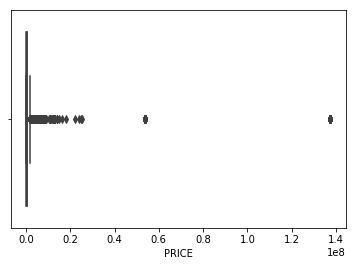

In [19]:
print(perc_outliers(sdat, 'PRICE', 1, 2.5))
sns.boxplot(x=sdat['PRICE'], whis=2.5)

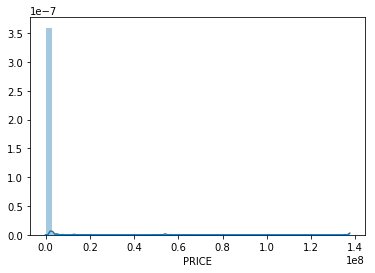

In [20]:
sns.distplot(sdat['PRICE'].dropna())

Percentage of outliers: 0.03231921724506956
None


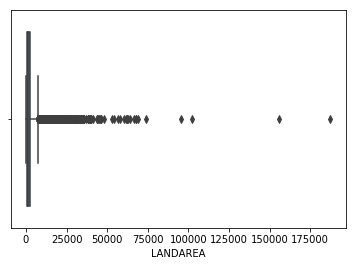

In [21]:
print(perc_outliers(sdat, 'LANDAREA', 1, 2.5))
sns.boxplot(x=sdat['LANDAREA'], whis=2.5)

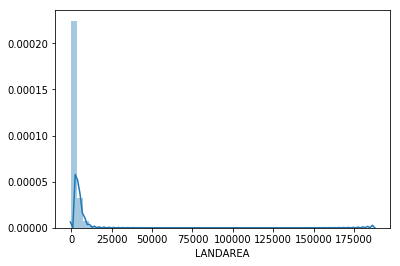

In [22]:
sns.distplot(sdat['LANDAREA'].dropna())

**Outlier detection for categorical data:**

In [23]:
#checking values for categorical data:
for col in catdf.columns:
    print(col) 
    print(catdf[col].value_counts().sort_index())
    print("")
    print("")

HEAT
Air Exchng           22
Air-Oil              69
Elec Base Brd       249
Electric Rad         93
Evp Cool             26
Forced Air        39386
Gravity Furnac       52
Hot Water Rad     22812
Ht Pump           16849
Ind Unit             35
No Data             211
Wall Furnace        707
Warm Cool         17332
Water Base Brd      272
Name: HEAT, dtype: int64


AC
0       38
N    18457
Y    79620
Name: AC, dtype: int64


SALEDATE
1982-06-11 00:00:00     1
1984-05-31 00:00:00     1
1984-07-20 00:00:00     1
1985-08-05 00:00:00     1
1986-06-10 00:00:00     1
1986-12-02 00:00:00     1
1988-04-13 00:00:00     1
1988-12-11 00:00:00     1
1990-05-17 00:00:00     1
1990-08-20 00:00:00     1
1990-09-29 00:00:00     1
1990-12-12 00:00:00     1
1991-03-29 00:00:00     1
1991-08-14 00:00:00     1
1991-11-29 00:00:00     1
1992-01-02 00:00:00     5
1992-01-03 00:00:00     2
1992-01-06 00:00:00     5
1992-01-07 00:00:00     4
1992-01-08 00:00:00     1
1992-01-09 00:00:00     4
1992-01-10 00:00

**Removing outliers:**

In [24]:
#The only data that was likely faulty (and not just out of "the norm") was
#STORIES: 250.00, 275.00, 826.00        
#YR_RMDL: 20

odat2 = sdat.loc[((sdat['STORIES'] < 30) | (sdat['STORIES'].isna()))  & ((sdat['YR_RMDL'] >= 1880) | (sdat['YR_RMDL'].isna()))]

print(odat2.shape)

(98110, 40)


In [25]:
#Numerical:
#Create a list of all row indices matching outliers from specified columns.
takind = []
def remove_outliers (df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    global iout
    iout = (df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]).index.tolist()
    for i in iout:
        if i not in takind:
            takind.append(i) 
    
remove_outliers(odat2, 'GBA', 1.5, 1.5)
remove_outliers(odat2, 'LIVING_GBA', 1.5, 1.5)
remove_outliers(odat2, 'LANDAREA', 1, 2.5)
remove_outliers(odat2, 'PRICE', 1, 2.5)
print(len(takind))

8356


In [26]:
#Remove those rows
odatd = odat2.drop(index=takind)
print(odatd.shape)

(89754, 40)


**Removing and replacing null values using location for fill value predictions:** 

In [27]:
#percentage of missing data per row in new dataset
def missingdat(df):
    percnan=(df.isnull().sum(axis=0))/len(df)
    nulcolstat = percnan[percnan>0]
    nullist = (nulcolstat.index).tolist()
    nuldat = sdat[nullist]
    print(nulcolstat)
print(missingdat(odatd))

NUM_UNITS             0.422689
AYB                   0.001081
YR_RMDL               0.413486
STORIES               0.422967
SALEDATE              0.000011
GBA                   0.422689
STYLE                 0.422689
STRUCT                0.422689
GRADE                 0.422689
CNDTN                 0.422689
EXTWALL               0.422689
ROOF                  0.422689
INTWALL               0.422689
KITCHENS              0.422700
LIVING_GBA            0.577311
ASSESSMENT_SUBNBHD    0.195713
CENSUS_BLOCK          0.425864
dtype: float64
None


In [28]:
#create categorical and numerical dataframes
catcol = []
numcol = []
for col in odatd.columns:
    if (odatd[col].dtype == object):
        catcol.append(col)
    if (odatd[col].dtype == np.int64) or (odatd[col].dtype == np.float64):
        numcol.append(col)
catdf = odatd[catcol].astype('category')
numdf = odatd[numcol].astype(np.float64)

**Filling numerical nulls using mean values according to neighborhoods:**

In [29]:
odatd.columns

Index(['HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB',
       'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'STYLE',
       'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS',
       'FIREPLACES', 'USECODE', 'LANDAREA', 'SOURCE', 'LIVING_GBA', 'ZIPCODE',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT',
       'BATHRMS'],
      dtype='object')

In [30]:
#NUM df with nulls:
numnulls = numdf.columns[numdf.isna().any()].tolist()
numnulldf = numdf[numnulls]
#NUM df without nulls:
numgooddf = numdf.drop(columns=numnulls)

In [31]:
#DF with means via neighborhood with WARD for grouping perspective. 
meandf= pd.DataFrame()
for col in numdf.columns:
    meandf[col] = (odatd.groupby(['WARD', 'ASSESSMENT_NBHD'])[col].apply(lambda x: x.mean()))
meandf.head(10)

NUM_UNITS     ROOMS     BEDRM          AYB  \
WARD   ASSESSMENT_NBHD                                                
Ward 1 Columbia Heights   1.298188  5.264477  2.447387  1934.719965   
       Kalorama           1.620690  3.888813  1.527797  1922.670337   
       Ledroit Park       1.247525  6.005305  3.002653  1917.562334   
       Mt. Pleasant       1.425799  5.069519  2.301757  1940.603976   
       Old City 2         1.292546  5.174251  2.164817  1953.441176   
Ward 2 Burleith           1.090047  7.235849  3.323113  1946.103774   
       Central-tri 1      1.988506  3.759507  1.282631  1969.738952   
       Central-tri 3           NaN  3.399596  1.201816  2000.330979   
       Foggy Bottom       1.151515  3.237601  0.957324  1957.430219   
       Georgetown         1.097983  5.513544  2.340293  1925.541502   

                             YR_RMDL          EYB   STORIES          PRICE  \
WARD   ASSESSMENT_NBHD                                                       
Ward 1 Columbia Heights  2006.705225  1958.864230  2.195016  438919.636299   
       Kalorama          1989.866332  1925.680851  2.635057  459430.100892   
       Ledroit Park      2007.490842  1961.952255  2.211221  468040.856764   
       Mt. Pleasant      2001.554069  1958.829259  2.422945  551102.723453   
       Old City 2        2002.021595  1969.894007  2.327707  574502.722531   
Ward 2 Burleith          2000.152284  1976.146226  2.182464  856860.976415   
       Central-tri 1     1988.458002  1969.083248  2.554598  484152.785714   
       Central-tri 3     2005.693069  2000.306256       NaN  502523.294147   
       Foggy Bottom      1984.201923  1964.439446  2.250000  342703.424452   
       Georgetown        1993.651226  1967.435102  2.272719  757792.980248   

                         SALE_NUM          GBA  KITCHENS  FIREPLACES  \
WARD   ASSESSMENT_NBHD                                                 
Ward 1 Columbia Heights  1.858581  1609.806013  1.345964    0.208686   
       Kalorama          1.882636  2393.839080  1.747126    0.404255   
       Ledroit Park      1.806366  1554.864686  1.280528    0.432361   
       Mt. Pleasant      1.899924  1951.417808  1.447489    0.429717   
       Old City 2        1.934517  1583.151899  1.299578    0.410100   
Ward 2 Burleith          1.837264  1673.270142  1.132701    1.018868   
       Central-tri 1     1.804728  2000.850575  1.988506    0.257451   
       Central-tri 3     1.910192          NaN       NaN    0.029768   
       Foggy Bottom      1.717416  1333.530303  1.181818    1.302191   
       Georgetown        1.932280  1597.109510  1.162344    0.931151   

                           USECODE     LANDAREA   LIVING_GBA       ZIPCODE  \
WARD   ASSESSMENT_NBHD                                                       
Ward 1 Columbia Heights  15.418432  1039.873941   837.140915  20008.204802   
       Kalorama          16.568977   485.025395   808.086131  20009.000000   
       Ledroit Park      14.405836  1427.307692   809.797297  20001.000000   
       Mt. Pleasant      15.978228  1011.334989   870.839839  20009.389992   
       Old City 2        15.677580   686.937847   910.971586  20006.793563   
Ward 2 Burleith          11.841981  2205.502358  1688.500000  20007.000000   
       Central-tri 1     16.996917   258.365879   806.090909  20036.775437   
       Central-tri 3     16.995459   102.274470   860.033804  20002.804743   
       Foggy Bottom      16.431373   286.497116   633.885714  20034.653979   
       Georgetown        14.089165  1083.559819   946.009576  20007.000000   

                          LATITUDE  LONGITUDE  CENSUS_TRACT          X  \
WARD   ASSESSMENT_NBHD                                                   
Ward 1 Columbia Heights  38.928485 -77.028694   3220.106638 -77.028695   
       Kalorama          38.919409 -77.044936   4001.459849 -77.044939   
       Ledroit Park      38.916446 -77.017457   3400.000000 -77.017485   
       Mt. Pleasant      38.926836 -77.040546   3302.669977 -77

In [32]:
#Finding missing data in meandf:
nulmeancol = meandf.columns[meandf.isnull().any()]
nulmeanind = (meandf[meandf.isnull().any(axis=1)]).index.tolist()
print(nulmeancol)
print("")
print(nulmeanind)
meandf[nulmeancol]

Index(['NUM_UNITS', 'STORIES', 'GBA', 'KITCHENS', 'LIVING_GBA'], dtype='object')

[('Ward 2', 'Central-tri 3'), ('Ward 3', 'Foxhall'), ('Ward 3', 'Kent'), ('Ward 3', 'Massachusetts Avenue Heights'), ('Ward 3', 'Woodley'), ('Ward 4', 'Chevy Chase'), ('Ward 4', 'Colonial Village'), ('Ward 4', 'Crestwood'), ('Ward 4', 'Hawthorne'), ('Ward 4', 'Riggs Park'), ('Ward 4', 'Shepherd Heights'), ('Ward 5', 'Michigan Park'), ('Ward 5', 'Riggs Park'), ('Ward 7', 'Anacostia')]


NUM_UNITS   STORIES          GBA  \
WARD   ASSESSMENT_NBHD                                                  
Ward 1 Columbia Heights               1.298188  2.195016  1609.806013   
       Kalorama                       1.620690  2.635057  2393.839080   
       Ledroit Park                   1.247525  2.211221  1554.864686   
       Mt. Pleasant                   1.425799  2.422945  1951.417808   
       Old City 2                     1.292546  2.327707  1583.151899   
Ward 2 Burleith                       1.090047  2.182464  1673.270142   
       Central-tri 1                  1.988506  2.554598  2000.850575   
       Central-tri 3                       NaN       NaN          NaN   
       Foggy Bottom                   1.151515  2.250000  1333.530303   
       Georgetown                     1.097983  2.272719  1597.109510   
       Kalorama                       1.319149  2.936170  2467.702128   
       Old City 2                     1.737047  2.521429  1999.510363   
Ward 3 American University            1.033130  2.007411  1744.161290   
       Berkley                        1.021127  2.001761  2154.457746   
       Chevy Chase                    1.011639  2.150582  1907.483996   
       Cleveland Park                 1.032520  2.139566  2030.962060   
       Forest Hills                   1.058394  1.888686  2107.474453   
       Foxhall                        1.078704  2.226852  1669.810185   
       Garfield                       1.257511  2.333691  2040.291845   
       Glover Park                    1.248497  2.037074  1473.919840   
       Kent                           1.056277  1.928571  1918.974026   
       Massachusetts Avenue Heights   1.055556  2.375000  2361.722222   
       North Cleveland Park           1.028497  2.097150  1848.634715   
       Observatory Circle             1.100719  2.212230  2232.453237   
       Palisades                      1.073298  1.956806  1750.743455   
       Spring Valley                  1.005780  2.070809  2193.277457   
       Wakefield                      1.000000  2.111111  1936.562092   
       Wesley Heights                 1.018100  2.481900  1918.230769   
       Woodley                        1.041096  2.277397  2349.821918   
Ward 4 16th Street Heights            1.152720  2.091789  1960.877615   
       Brightwood                     1.051044  1.981283  1484.819026   
       Chevy Chase                    1.000907  2.057344  1985.198549   
       Chillum                        1.055980  1.870229  1462.974555   
       Colonial Village               1.000000  1.971014  2068.550725   
       Columbia Heights               1.174442  2.036004  1597.223124   
       Crestwood                      1.043290  2.133117  2193.614719   
       Hawthorne                      1.000000  1.410714  1936.857143   
       Petworth                       1.141692  2.004927  1476.516820   
       Riggs Park                     1.011364  1.960076  1119.553030   
       Shepherd Heights               1.005236  2.066754  2022.007853   
       Takoma Park                    1.038186  1.857831  1395.732697   
Ward 5 Brentwood                      1.598958  1.983724  1402.382812   
       Brookland                      1.098229  2.091680  1423.446457   
       Eckington                      1.371457  2.071114  1625.255132   
       Fort Lincoln                   1.001767  2.195671  1716.828622   
       Ledroit Park                   1.373541  2.288424  1815.727626   
       Michigan Park                  1.012469  1.936250  1471.583541   
       Old City 2                     1.400881  2.095815  1600.784141   
       Riggs Park                     1.010786  1.963790  1183.147920   
       Trinidad                       1.542479  2.008879  1449.780641   
       Woodridge                      1.018800  1.876679  1474.636526   
Ward 6 Capitol Hill                   1.443425  2.227050  1710.089908   
       Old City 1                     1.235413  2.105829  1468.210511   
       Old City 2     

In [33]:
#Filling missing data in central tri-3 with data from central tri-1:
fillcols = meandf.columns[(meandf.loc[('Ward 2', 'Central-tri 3')].isnull())]
meandf.loc[('Ward 2', 'Central-tri 3'), fillcols] = meandf.loc[('Ward 2', 'Central-tri 1'), fillcols]

In [34]:
#Filling the rest of meandf with means of Wards. 
for col in meandf:
    meandf[col] = meandf[col].transform(lambda x: x.fillna(x.mean()))

In [35]:
#prepare df to use as dict to fill NaNs:
meandf = meandf.reset_index(level='WARD')

In [36]:
#filling missing numerical data



numfilleddf = pd.DataFrame()
numdf2 = pd.concat([numdf, odatd['ASSESSMENT_NBHD']], axis=1).astype('category')
for col in numnulldf.columns:
    #get index of missing values
    colindex = numdf2[numdf2[col].isnull()].index.tolist()
    #generate mean dictionary
    coldict = dict(zip(meandf.index, meandf[col])) 
    #corresponding neighborhood list from df
    nlist = []
    for i in colindex:
        nlist.append(numdf2.loc[i, 'ASSESSMENT_NBHD'])           
    #fill nans
    for i, n in zip(colindex, nlist):
        filler = coldict[n]
        if filler not in numdf2[col].cat.categories:
            numdf2[col] = numdf2[col].cat.add_categories([filler])
        numfilleddf[col] = numdf2[col].fillna(filler)
               

**Filling categorical null values using mode values according to neighborhoods:**

In [37]:
#CAT df with nulls 
catnulls = catdf.columns[catdf.isna().any()].tolist()
catnulldf = catdf[catnulls]
#CAT df without nulls 
catgooddf = catdf.drop(columns=catnulls)

In [38]:
#Df with mode values. 
modedf = pd.DataFrame()
for col in catdf.columns:
    modedf[col] = odatd.groupby('ASSESSMENT_NBHD')[col].apply(lambda x: x.mode())
modedf.head()

,,HEAT,AC,SALEDATE,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,SOURCE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
ASSESSMENT_NBHD,,,,,,,,,,,,,,,,,,,
16th Street Heights,0,Hot Water Rad,Y,2016-08-18 00:00:00,Q,2 Story,Single,Good Quality,Good,Common Brick,Metal- Sms,Hardwood,Residential,16th Street Heights,049 A 16th Street Heights,002001 2010,Ward 4,2798,NW
American University,0,Warm Cool,Y,2005-09-30 00:00:00,Q,2 Story,Single,Good Quality,Good,Common Brick,Slate,Hardwood,Residential,American University,001 B American University,001001 1013,Ward 3,1730,NW
Anacostia,0,Forced Air,Y,2013-07-16 00:00:00,Q,2 Story,Row Inside,Average,Average,Common Brick,Metal- Sms,Hardwood,Residential,Anacostia,002 B Anacostia,007504 1004,Ward 8,5807,SE
Barry Farms,0,Forced Air,Y,2006-02-08 00:00:00,Q,2 Story,Row Inside,Average,Average,Common Brick,Built Up,Hardwood,Condominium,Barry Farms,NaN,007407 2008,Ward 8,5869,SE
Berkley,0,Warm Cool,Y,2014-06-27 00:00:00,Q,2 Story,Single,Very Good,Good,Common Brick,Comp Shingle,Hardwood,Residential,Berkley,004 A Berkley,000802 1001,Ward 3,1368,NW


In [39]:
#Filling NaNs in mode df:

#find which groups have no subneighborhoods assigned
subindex = modedf[modedf['ASSESSMENT_SUBNBHD'].isnull()].index.tolist()

#get neighborhoods for each of those groups:
subnlist = []
for num in subindex:
    subnlist.append(modedf.loc[num, 'ASSESSMENT_NBHD'])
    
#assign neighborhood name to subneighborhood name:
fillvals = []
for i, val in zip(subindex, subnlist):
    modedf.loc[i, 'ASSESSMENT_SUBNBHD'] = val

In [40]:
#filling Central-tri 3 data with central-tri 1 data
print((modedf[modedf.isnull().any(axis=1)]).index.tolist())
modedf = modedf.fillna(method='ffill')

[('Central-tri 3', 0)]


In [41]:
#filling missing categorical data

catfilleddf = pd.DataFrame()
catdf2 = catdf
for col in catnulldf.columns:
    #get index of missing values
    colindex = catdf2[catdf2[col].isnull()].index.tolist()
    #generate mode dictionary
    coldict = dict(zip(modedf['ASSESSMENT_NBHD'], modedf[col])) 
    #corresponding neighborhood list from df
    nlist = []
    for i in colindex:
        nlist.append(catdf2.loc[i, 'ASSESSMENT_NBHD'])           
    #fill nans
    for i, n in zip(colindex, nlist):
        filler = coldict[n]
        if filler not in catdf2[col].cat.categories:
            catdf2[col] = catdf2[col].cat.add_categories([filler])
        catfilleddf[col] = catdf2[col].fillna(filler)

**Creating final dataframe by joining filled categorical and numerical dataframes:**

In [42]:
finaldf = (pd.concat([catgooddf, catfilleddf, numgooddf, numfilleddf], axis=1))
print(finaldf.shape)
print(missingdat(finaldf))
finaldf = finaldf.rename(index=str, columns={"ASSESSMENT_NBHD": "NBHD", "ASSESSMENT_SUBNBHD": "SUBNBHD", "SOURCE": "TYPE", 
                                   "SALEDATE": "SALE_DATE", "EYB": "YR_EXT", "AYB": "YR_ORIGIN", "LIVING_GBA": "GBA_LIVING", 
                                    "NUM_UNITS": "UNITS", "NUM_ROOMS": "ROOMS", "BEDRM": "BEDRMS"})
finaldf = finaldf.loc[:, ['PRICE', 'SALE_DATE', 'SALE_NUM', 'QUALIFIED', 
'QUADRANT', 'WARD', 'SQUARE', 'NBHD', 'SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'X', 'Y', 
'STYLE', 'STRUCT', 'USECODE', 'UNITS', 'STORIES', 'GRADE', 'CNDTN', 
'LANDAREA', 'GBA', 'GBA_LIVING',
'YR_ORIGIN', 'YR_EXT', 'YR_RMDL',
'ROOMS', 'BEDRMS', 'BATHRMS', 'KITCHENS', 
'HEAT', 'AC', 'FIREPLACES', 'ROOF', 'INTWALL', 'EXTWALL']]

finaldf.head()





(89754, 40)
Series([], dtype: float64)
None


,PRICE,SALE_DATE,SALE_NUM,QUALIFIED,QUADRANT,WARD,SQUARE,NBHD,SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,ZIPCODE,LATITUDE,LONGITUDE,X,Y,STYLE,STRUCT,USECODE,UNITS,STORIES,GRADE,CNDTN,LANDAREA,GBA,GBA_LIVING,YR_ORIGIN,YR_EXT,YR_RMDL,ROOMS,BEDRMS,BATHRMS,KITCHENS,HEAT,AC,FIREPLACES,ROOF,INTWALL,EXTWALL
0,1095000.0,2003-11-25 00:00:00,1.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2006,20009.0,38.914680,-77.040832,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2522.0,723.172363,1910.0,1972.0,1988.0,8.0,4.0,4.0,2.0,Warm Cool,Y,5.0,Metal- Sms,Hardwood,Common Brick
3,1602000.0,2006-07-12 00:00:00,1.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2006,20009.0,38.914683,-77.040629,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Good,1680.0,2484.0,723.172363,1900.0,1984.0,2003.0,8.0,5.0,4.0,2.0,Hot Water Rad,Y,3.0,Built Up,Hardwood,Common Brick
7,1050000.0,2011-09-29 00:00:00,1.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2005,20009.0,38.915408,-77.040129,-77.040429,38.914881,3 Story,Row Inside,24.0,2.0,3.0,Very Good,Average,1627.0,2401.0,723.172363,1906.0,1972.0,2011.0,8.0,4.0,4.0,2.0,Hot Water Rad,Y,1.0,Metal- Sms,Hardwood,Common Brick
8,1430000.0,2018-05-03 00:00:00,4.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2005,20009.0,38.915017,-77.039903,-77.040429,38.914881,2 Story,Row Inside,24.0,2.0,2.0,Above Average,Very Good,1424.0,1488.0,723.172363,1908.0,1967.0,2008.0,7.0,3.0,4.0,2.0,Warm Cool,Y,1.0,Built Up,Hardwood,Common Brick
14,1325000.0,2011-09-30 00:00:00,1.0,Q,NW,Ward 2,0152,Old City 2,040 D Old City 2,4201.0,004201 2005,20009.0,38.915038,-77.039716,-77.040429,38.914881,2 Story,Row Inside,24.0,2.0,2.0,Above Average,Very Good,1815.0,2692.0,723.172363,1917.0,1967.0,2000.0,5.0,3.0,4.0,2.0,Warm Cool,Y,1.0,Metal- Sms,Hardwood,Stucco


## For data exploration, we can think of the columns in categories: <br>
**Sales:** <br>
-  PRICE
-  SALE_DATE
-  SALE_NUM
-  QUALIFIED <br>

**Location:** <br>
-  QUADRANT
-  WARD
-  SQUARE
-  ASSESSMENT_NBHD
-  ASSESSMENT_SUBNBHD
-  CENSUS_TRACT
-  CENSUS_BLOCK
-  ZIPCODE
-  LATITUDE
-  LONGITUDE
-  X
-  Y <br>

**Structures:** <br>
-  STYLE
-  STRUCT
-  USECODE
-  UNITS
-  STORIES
-  GRADE
-  CNDTN <br>

**Areas:** <br>
-  LANDAREA
-  GBA (gross building area)
-  GBA_LIVING <br>

**Timeline:** <br>
-  YR_ORIGIN (year original structure was built)
-  YR_EXT (year improvements were built) 
-  YR_RMDL <br>

**Rooms:** <br>
-  ROOMS
-  KITCHENS
-  BATHRMS
-  BEDRMS <br>

**Qualities:** <br>
-  HEAT
-  AC
-  FIREPLACES
-  INTWALL
-  ROOF
-  EXTWALL <br>

## SALES: 

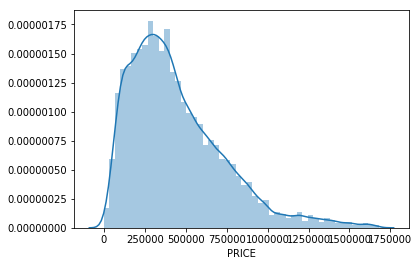

In [43]:
sns.distplot(finaldf.PRICE)

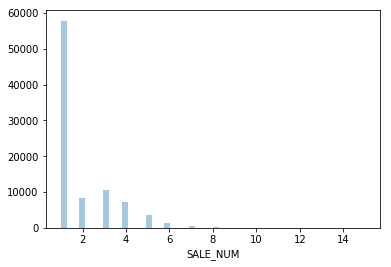

In [44]:
sns.distplot(finaldf.SALE_NUM, kde=False)
sns.set_style({"xtick.top": False}, {"xtick.bottom": False})

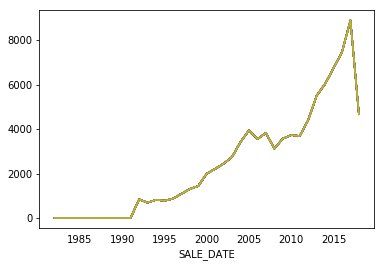

In [45]:
finaldf.SALE_DATE = finaldf.SALE_DATE.astype("datetime64")
finaldf.groupby(finaldf.SALE_DATE.dt.year).count().plot(legend=None)

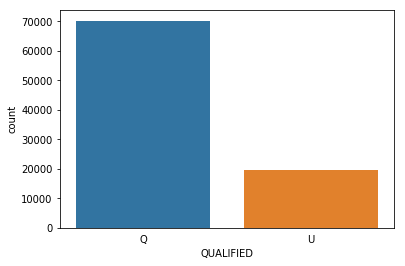

In [46]:
sns.countplot(finaldf['QUALIFIED'])

**Location:** <br>
-  QUADRANT
-  WARD
-  SQUARE
-  NBHD
-  SUBNBHD
-  CENSUS_TRACT
-  CENSUS_BLOCK
-  ZIPCODE
-  LATITUDE
-  LONGITUDE
-  X
-  Y <br>

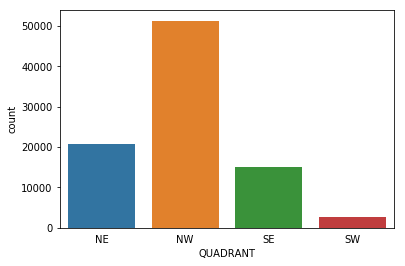

In [47]:
sns.countplot(finaldf.QUADRANT)

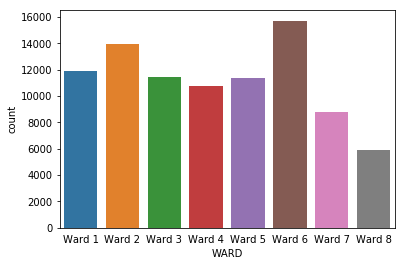

In [48]:
sns.countplot(finaldf.WARD)

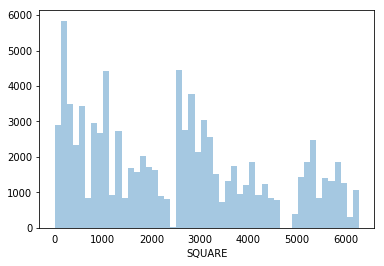

In [49]:
sq = finaldf.SQUARE.astype(float)
sns.distplot(sq, kde = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text xticklabel objects>)

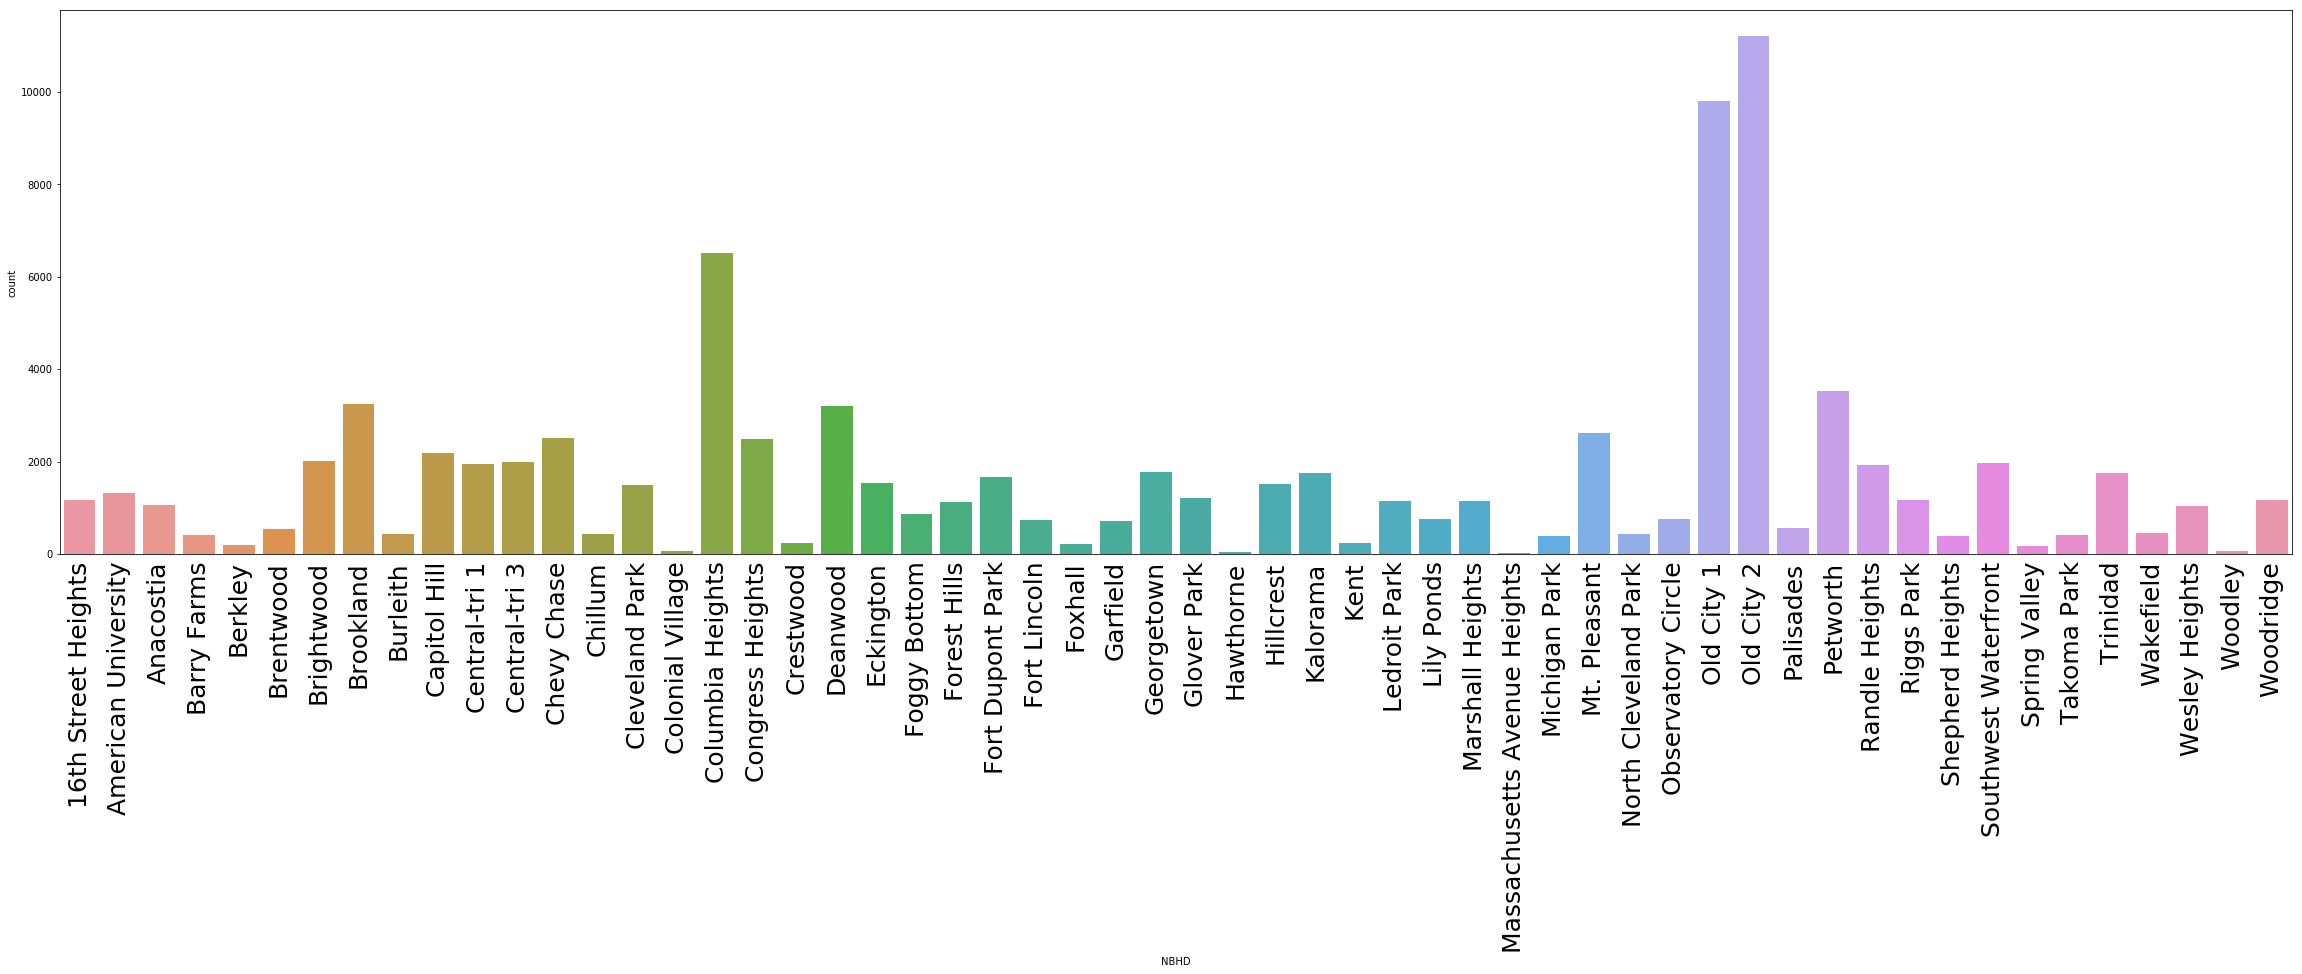

In [50]:
plt.figure(figsize=(40,10))
sns.countplot(finaldf.NBHD)
plt.xticks(rotation=90, size=25)

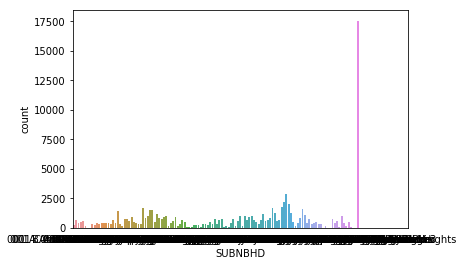

In [51]:
sns.countplot(finaldf.SUBNBHD)
#use groupby object with beighborhoods?? 

In [60]:
ngrouped = finaldf.groupby(['WARD', 'SUBNBHD']).count()
ngrouped

PRICE  SALE_DATE  SALE_NUM  QUALIFIED  \
WARD   SUBNBHD                                                                
Ward 1 001 A American University        NaN        NaN       NaN        NaN   
       001 B American University        NaN        NaN       NaN        NaN   
       001 C American University        NaN        NaN       NaN        NaN   
       002 A Anacostia                  NaN        NaN       NaN        NaN   
       002 B Anacostia                  NaN        NaN       NaN        NaN   
       004 A Berkley                    NaN        NaN       NaN        NaN   
       004 B Berkley                    NaN        NaN       NaN        NaN   
       004 C Berkley                    NaN        NaN       NaN        NaN   
       005 A Brentwood                  NaN        NaN       NaN        NaN   
       005 B Brentwood                  NaN        NaN       NaN        NaN   
       006 A Brightwood                 NaN        NaN       NaN        NaN   
       006 B Brightwood                 NaN        NaN       NaN        NaN   
       006 C Brightwood                 NaN        NaN       NaN        NaN   
       006 D Brightwood                 NaN        NaN       NaN        NaN   
       006 E Brightwood                 NaN        NaN       NaN        NaN   
       007 A Brookland                  NaN        NaN       NaN        NaN   
       007 B Brookland                  NaN        NaN       NaN        NaN   
       007 C Brookland                  NaN        NaN       NaN        NaN   
       007 D Brookland                  NaN        NaN       NaN        NaN   
       007 E Brookland                  NaN        NaN       NaN        NaN   
       008 A Burleith                   NaN        NaN       NaN        NaN   
       008 B Burleith                   NaN        NaN       NaN        NaN   
       009 A Capitol Hill               NaN        NaN       NaN        NaN   
       009 B Capitol Hill               NaN        NaN       NaN        NaN   
       009 C Capitol Hill               NaN        NaN       NaN        NaN   
       011 A Chevy Chase                NaN        NaN       NaN        NaN   
       011 B Chevy Chase                NaN        NaN       NaN        NaN   
       011 C Chevy Chase                NaN        NaN       NaN        NaN   
       011 D Chevy Chase                NaN        NaN       NaN        NaN   
       011 E Chevy Chase                NaN        NaN       NaN        NaN   
       015 A Columbia Heights        1675.0     1675.0    1675.0     1675.0   
       015 B Columbia Heights           NaN        NaN       NaN        NaN   
       015 C Columbia Heights         916.0      916.0     916.0      916.0   
       015 D Columbia Heights        1528.0     1528.0    1528.0     1528.0   
       015 E Columbia Heights        1545.0     1545.0    1545.0     1545.0   
       016 A Congress Heights           NaN        NaN       NaN        NaN   
       016 B Congress Heights           NaN        NaN       NaN        NaN   
       016 C Congress Heights           NaN        NaN       NaN        NaN   
       018 A Deanwood                   NaN        NaN       NaN        NaN   
       018 B Deanwood                   NaN        NaN       NaN        NaN   
       018 C Deanwood                   NaN        NaN       NaN        NaN   
       018 D Deanwood                   NaN        NaN       NaN        NaN   
       018 E Deanwood                   NaN        NaN       NaN        NaN   
       019 A Eckington                  NaN        NaN       NaN        NaN   
       019 B Eckington                  NaN        NaN       NaN        NaN   
       022 A Fort Dupont Park           NaN        NaN       NaN        NaN   
       022 B Fort Dupont Park           NaN        NaN       NaN        NaN   
       022 C Fort Dupont Park           NaN        NaN       NaN        NaN   
       022 D Fort Dupont Park           NaN        NaN       NaN        NaN   
       02

In [52]:
CENSUS_TRACT
-  CENSUS_BLOCK
-  ZIPCODE
-  LATITUDE
-  LONGITUDE
-  X
-  Y <br>

SyntaxError: invalid syntax (<ipython-input-52-74de1174f1e1>, line 7)

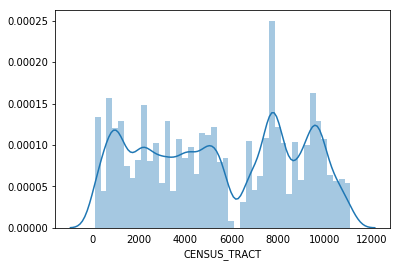

In [53]:
sns.distplot(finaldf.CENSUS_TRACT)

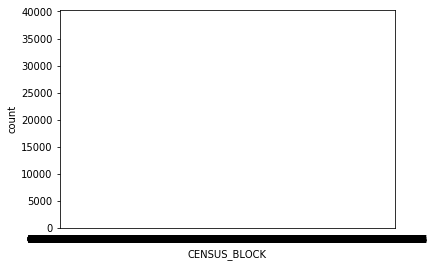

In [54]:
sns.countplot(finaldf.CENSUS_BLOCK)

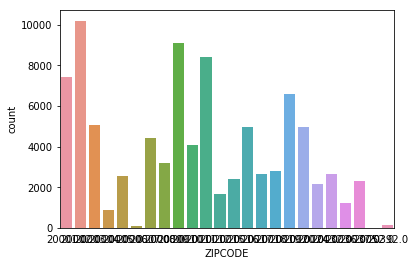

In [55]:
sns.countplot(finaldf.ZIPCODE)

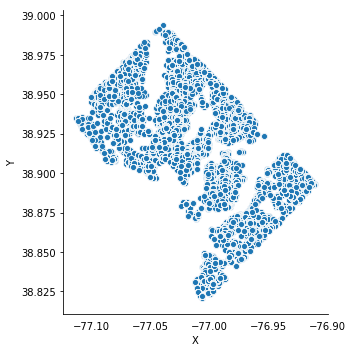

In [56]:
sns.relplot(data=finaldf, x='X', y='Y')

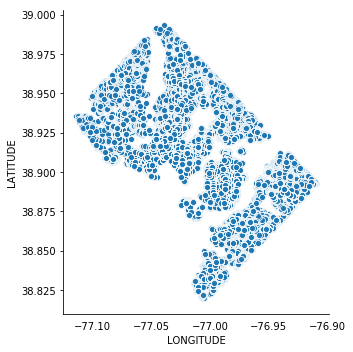

In [57]:
sns.relplot(data=finaldf, x='LONGITUDE', y='LATITUDE')

In [58]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}